In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm.notebook import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from tsp_solver import TspDistanceEnvironment, DeliveryQAgent, run_episode, run_n_episodes

Membuat Environment TSP dengan 10 titik acak.
Peta Awal:


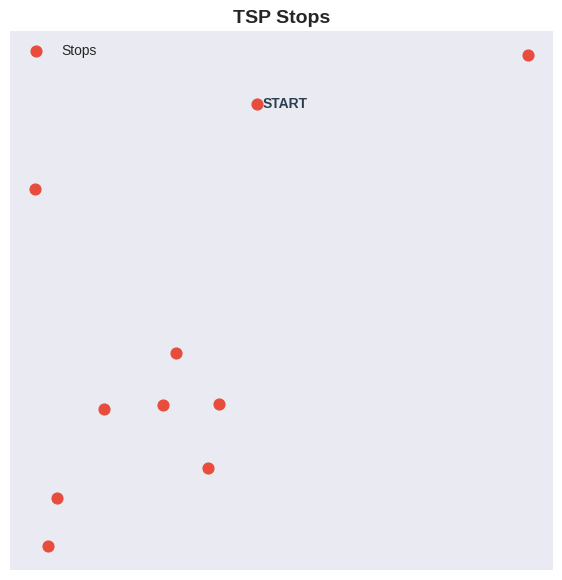

In [37]:
env = TspDistanceEnvironment(n_stops=10)

# Tampilkan peta awal (hanya akan ada titik START)
print("Peta Awal:")
env.render()

In [38]:
print("Titik yang sudah dikunjungi:", env.stops)

Titik yang sudah dikunjungi: [0]



Menjalankan beberapa langkah manual...
Peta setelah beberapa langkah manual:


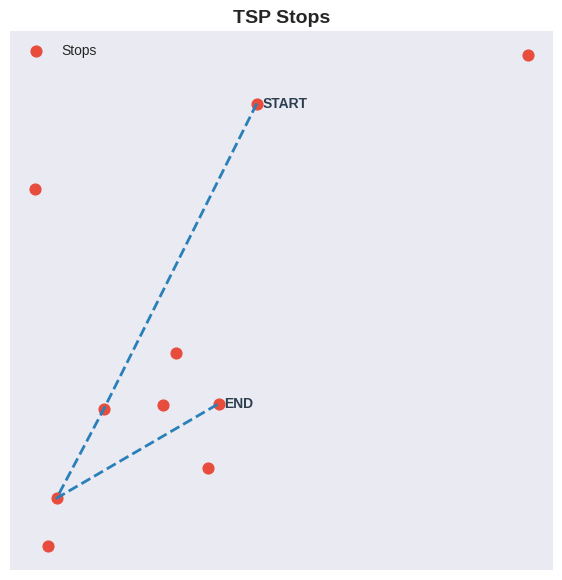

In [39]:
print("\nMenjalankan beberapa langkah manual...")
for i in [0, 1, 2, 3]:
    # Pastikan kita tidak mengunjungi titik yang sama dengan titik saat ini
    if i != env._get_state(): 
        env.step(i)

# Tampilkan peta lagi setelah beberapa langkah manual
print("Peta setelah beberapa langkah manual:")
env.render()

In [40]:
print("Titik yang sudah dikunjungi sekarang:", env.stops)

Titik yang sudah dikunjungi sekarang: [0, 1, 2, 3]


Membuat Environment TSP dengan 20 titik acak.
Memulai pelatihan untuk 1000 episode...


Training Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

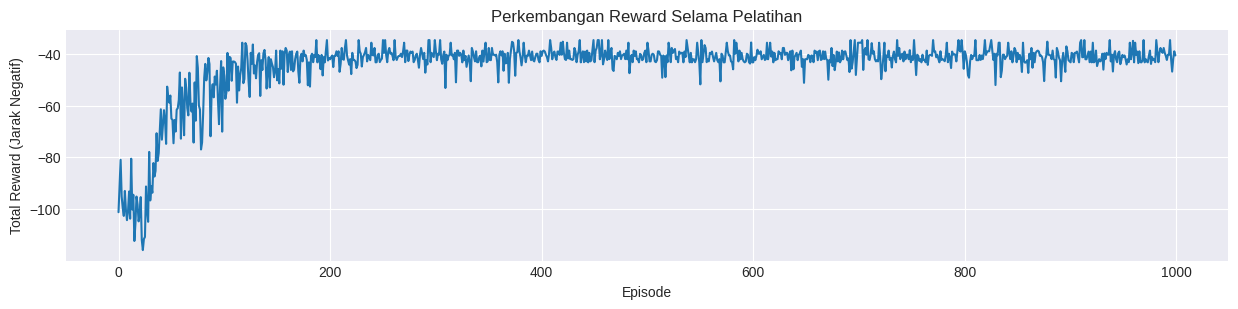

Menyimpan animasi pelatihan sebagai GIF...


In [47]:
env_train = TspDistanceEnvironment(n_stops=20)

# Buat agen baru
# agent = DeliveryQAgent(env_train.observation_space, env_train.action_space,
#                        epsilon_decay=0.9995, lr=0.8, gamma=0.95)
agent = DeliveryQAgent(env_train.observation_space,env_train.action_space)

# Latih agen selama 10,000 episode
# run_n_episodes(env_train, agent, "training_distance_500_stops.gif")
trained_env, trained_agent = run_n_episodes(env_train, agent, 
                                            "training_20_stops.gif")


Rute efisien yang ditemukan (urutan kunjungan):
6 -> 14 -> 19 -> 8 -> 9 -> 13 -> 12 -> 17 -> 10 -> 18 -> 2 -> 15 -> 11 -> 4 -> 16 -> 3 -> 5 -> 0 -> 1 -> 7

Total Jarak dari Rute Ini: 40.63

Visualisasi Rute Efisien yang Ditemukan:


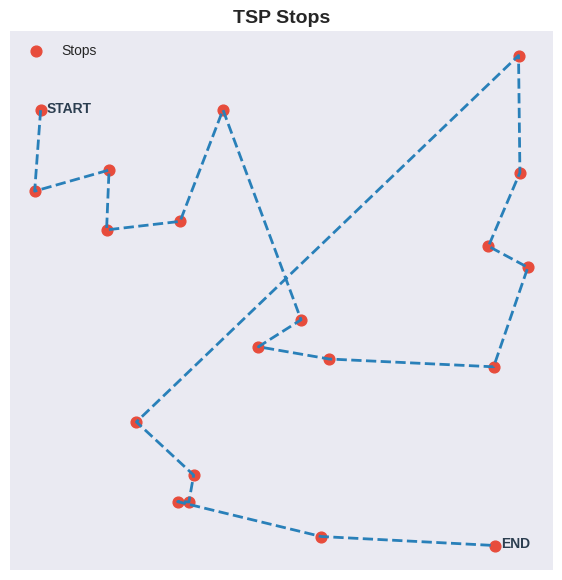

In [48]:
# Sel 9: MENAMPILKAN HASIL AKHIR

# print("="*50)
# print("PELATIHAN SELESAI")
# print("="*50)

# 1. Tampilkan Rute Optimal yang Ditemukan (urutan indeks titik)
optimal_route = trained_env.stops
print(f"\nRute efisien yang ditemukan (urutan kunjungan):")
print(" -> ".join(map(str, optimal_route)))

# 2. Hitung Total Jarak dari Rute Tersebut
total_distance = 0
for i in range(len(optimal_route) - 1):
    start_node = optimal_route[i]
    end_node = optimal_route[i+1]
    distance = trained_env.distance_matrix[start_node, end_node]
    total_distance += distance

print(f"\nTotal Jarak dari Rute Ini: {total_distance:.2f}")

# 3. Visualisasikan Rute Optimal Tersebut
print("\nVisualisasi Rute Efisien yang Ditemukan:")
trained_env.render()

In [4]:
from tsp_time_solver import  TspTimeEnvironment, DeliveryQAgent, run_episode, run_n_episodes

In [10]:
env_time = TspTimeEnvironment(n_stops=20)

Membuat Environment TSP Waktu dengan 20 titik acak.


In [11]:
agent_time = DeliveryQAgent(env_time.observation_space, env_time.action_space)

Memulai pelatihan untuk 1000 episode...


Training Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 369.54it/s]


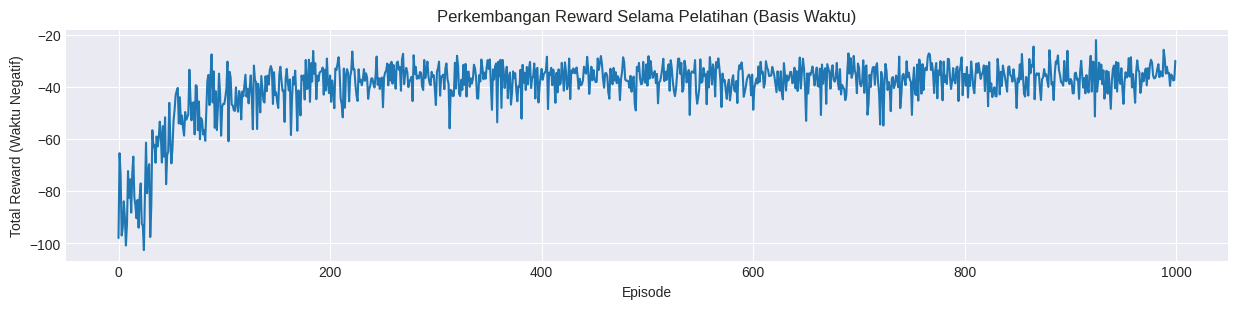

Menyimpan animasi pelatihan sebagai GIF...


In [12]:
trained_env_time, trained_agent_time = run_n_episodes(
    env_time, 
    agent_time, 
    name="tsp_time_20_training.gif"
)

            ANALISIS HASIL (WAKTU STOKASTIK)

Rute efisien (berbasis waktu) yang ditemukan:
19 -> 17 -> 2 -> 8 -> 14 -> 13 -> 5 -> 10 -> 12 -> 7 -> 3 -> 1 -> 9 -> 4 -> 16 -> 0 -> 18 -> 15 -> 6 -> 11

Menjalankan 1000 kali simulasi untuk menguji rute yang ditemukan...


Testing Route:   0%|          | 0/1000 [00:00<?, ?it/s]


--- Statistik Waktu Tempuh dari Rute yang Ditemukan ---
Rata-rata Waktu Tempuh: 32.01 unit waktu
Standar Deviasi: 2.82 (menunjukkan seberapa besar variasi lalu lintas)
Waktu Tempuh Tercepat (beruntung): 22.98 unit waktu
Waktu Tempuh Terlama (sial): 40.99 unit waktu


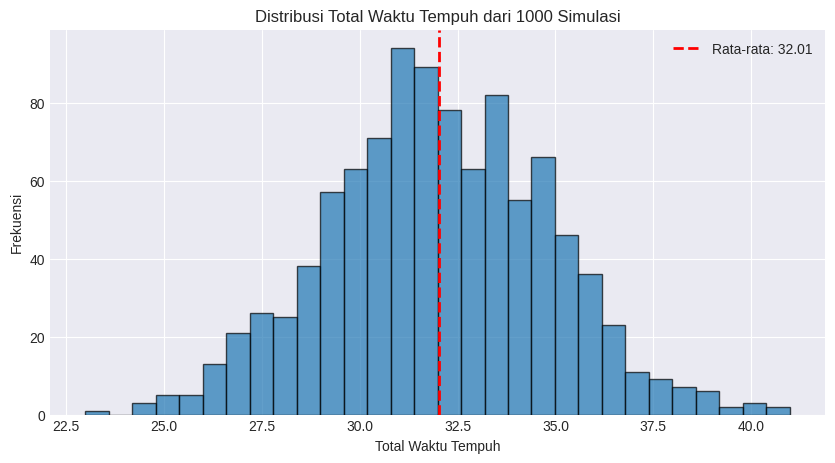


Visualisasi Rute Efisien yang Ditemukan:


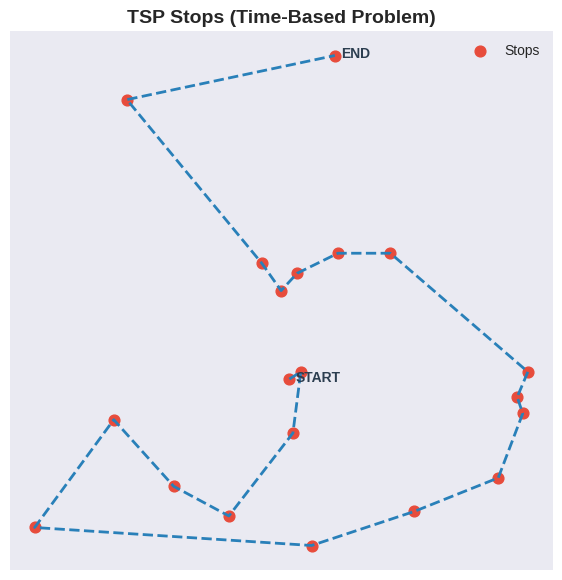

In [13]:
print("="*50)
print("            ANALISIS HASIL (WAKTU STOKASTIK)")
print("="*50)

# Ambil rute yang ditemukan oleh agen dari episode terakhir
optimal_route_time = trained_env_time.stops
print(f"\nRute efisien (berbasis waktu) yang ditemukan:")
print(" -> ".join(map(str, optimal_route_time)))

# =========================================================================
# ==      PENGUJIAN RUTE: Mensimulasikan Rute yang Ditemukan N Kali      ==
# =========================================================================
# Karena lingkungan waktu itu acak, kita perlu menguji rute yang sama
# beberapa kali untuk mendapatkan estimasi waktu tempuh rata-ratanya.

n_test_runs = 1000  # Jumlah pengujian
total_times = []    # Untuk menyimpan total waktu dari setiap pengujian

print(f"\nMenjalankan {n_test_runs} kali simulasi untuk menguji rute yang ditemukan...")

for _ in tqdm(range(n_test_runs), desc="Testing Route"):
    current_run_time = 0
    # Lakukan perjalanan sesuai urutan 'optimal_route_time'
    for i in range(len(optimal_route_time) - 1):
        start_node = optimal_route_time[i]
        end_node = optimal_route_time[i+1]
        
        # Minta environment untuk memberikan waktu tempuh (reward) untuk perjalanan ini
        # Setiap panggilan akan menghasilkan nilai yang sedikit berbeda karena lalu lintas
        travel_time = trained_env_time._get_reward(start_node, end_node)
        current_run_time += travel_time
        
    total_times.append(current_run_time)

# =========================================================================
# ==                         ANALISIS STATISTIK                            ==
# =========================================================================

# Hitung statistik dari hasil pengujian
avg_time = np.mean(total_times)
std_time = np.std(total_times)
min_time = np.min(total_times)
max_time = np.max(total_times)

print("\n--- Statistik Waktu Tempuh dari Rute yang Ditemukan ---")
print(f"Rata-rata Waktu Tempuh: {avg_time:.2f} unit waktu")
print(f"Standar Deviasi: {std_time:.2f} (menunjukkan seberapa besar variasi lalu lintas)")
print(f"Waktu Tempuh Tercepat (beruntung): {min_time:.2f} unit waktu")
print(f"Waktu Tempuh Terlama (sial): {max_time:.2f} unit waktu")

# Visualisasikan distribusi waktu tempuh
plt.figure(figsize=(10, 5))
plt.hist(total_times, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribusi Total Waktu Tempuh dari " + str(n_test_runs) + " Simulasi")
plt.xlabel("Total Waktu Tempuh")
plt.ylabel("Frekuensi")
plt.axvline(avg_time, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {avg_time:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasikan rute final (sama seperti sebelumnya)
print("\nVisualisasi Rute Efisien yang Ditemukan:")
trained_env_time.render()